In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Kuramoto model
$$ \dot \varphi_i = \omega_i + \frac K N \sum_{j=1}^N{a_{ij}}\sin(\varphi_j - \varphi_i)$$

0.99
(2000,)


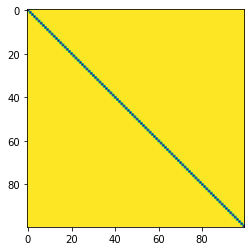

In [2]:
#define all needed variables
N = 100
phi = np.zeros(N)
omega = np.random.uniform(low=-1, high=1, size=(N))
# omega = omega**3 - 0.3*omega
K = 9.5

def make_A(N, p = 1):
    #make an adjaceny matrix with p chance that any two give oscillators are connected. 
    #p = 1 is fully connected. 
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1,N):
            if(np.random.uniform() < p):
                A[i,j] = 1
                A[j,i] = 1
    return A

# A = np.ones((N,N)) - np.eye(N) #this is all to all right now, but want to make it so you can set the number of connections
A = make_A(N, p = 1)
print(np.sum(A)/(N**2))
plt.figure()
plt.imshow(A)
dt = 0.01 #timestep size, if this is too large, weird things seem to be happening
T_max = 20 #maximum time to run simulation for
t = np.arange(0, T_max, dt)
print(t.shape)

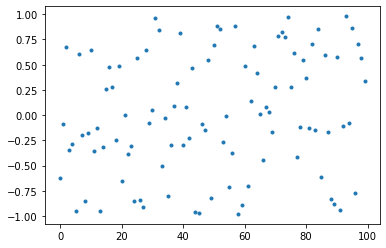

In [3]:
plt.plot(omega, '.')

In [4]:
def phi_dot(phi, t, omega, K):
    N = len(phi)
    dphi_dt = np.zeros(np.shape(phi))
    for i in range(N):
        dphi_dt[i] = omega[i] + K/N *np.sum(A[i]@np.sin(phi - phi[i]))
    return dphi_dt

print(phi_dot(phi, 0, omega, K))

[-0.6208202  -0.08283146  0.67549429 -0.34380056 -0.28666913 -0.94794744
  0.60889106 -0.19805007 -0.85086586 -0.17539559  0.64106863 -0.35597959
 -0.12585859 -0.95087985 -0.31686893  0.26216048  0.47729465  0.28087298
 -0.24713069  0.48811056 -0.65432678  0.00677449 -0.3815667  -0.30270105
 -0.84826667  0.56457881 -0.83660094 -0.91159724  0.64440034 -0.07883654
  0.05028525  0.96674051  0.84069081 -0.50502615 -0.02444804 -0.79861379
 -0.29203828  0.09129705  0.32278222  0.81261343 -0.2929055   0.07691591
 -0.22281107  0.46879824 -0.95527949 -0.97008085 -0.08309492 -0.1465428
  0.54475986 -0.81548372  0.69168393  0.88595408  0.85615354 -0.26866962
 -0.01249084 -0.70790721 -0.37532395  0.88719434 -0.9781157  -0.89144808
  0.48971921 -0.70154973  0.13727655  0.68938474  0.41782899  0.00992184
 -0.44121766  0.07710151  0.03292884 -0.16343484  0.28232495  0.78202379
  0.82473029  0.77955481  0.97622432  0.27897962  0.61857444 -0.4100924
 -0.11804724  0.54287406  0.37058776 -0.12738954  0.7

[0.25469745 0.31148644 0.39152091 0.28395447 0.28998349 0.2200724
 0.38448102 0.29933317 0.23035894 0.30172297 0.38788174 0.28266906
 0.3069482  0.21976153 0.28679669 0.34787442 0.37058026 0.34984869
 0.29415525 0.37172237 0.25115531 0.32093696 0.27996831 0.28829178
 0.2306342  0.37979901 0.23186957 0.22392518 0.3882339  0.31190779
 0.32552585 0.42235083 0.40899775 0.26693239 0.31764404 0.23589137
 0.28941694 0.32985127 0.35427073 0.40602558 0.28932543 0.32833451
 0.29672101 0.36968312 0.21929509 0.21772572 0.31145865 0.30476646
 0.37770537 0.23410548 0.39323265 0.41379079 0.41063491 0.29188271
 0.31890512 0.24548921 0.28062726 0.41392216 0.2168737  0.22606018
 0.37189224 0.24616163 0.33470081 0.39298954 0.36430207 0.32126889
 0.27367086 0.32835409 0.32369534 0.30298465 0.35000188 0.40278833
 0.40730814 0.40252708 0.42335619 0.34964892 0.38550434 0.27695703
 0.30777212 0.37750617 0.3593157  0.30678672 0.39469154 0.30514676
 0.41080195 0.25516572 0.38349837 0.3028817  0.23206328 0.22689

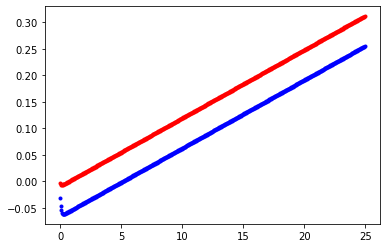

In [5]:
n_timestep = 500
dt = 0.05
t = 0
phi = np.zeros(N)
for i in range(n_timestep):
    phi += phi_dot(phi, t, omega, K)*dt
#     print(phi)
#     for j in range(len(phi)):
#         if(phi[j]<0):
#             phi[j] += 2*np.pi
#         if(phi[j]>(2*np.pi)):
#             phi[j] -= 2*np.pi
    plt.plot(t, phi[0], 'b.')
    plt.plot(t, phi[1], 'r.')
    t += dt
print(phi)

In [6]:
# i = 0
# phi = np.random.uniform(size=N)
# # print(phi)
# print(np.sum(A[i]@np.sin(phi - phi[i])))

# answer = 0 
# for i in range(N):
#     if i >0:
#         answer += np.sin(phi[i] - phi[0])
# print(answer)

0.012863037018484005


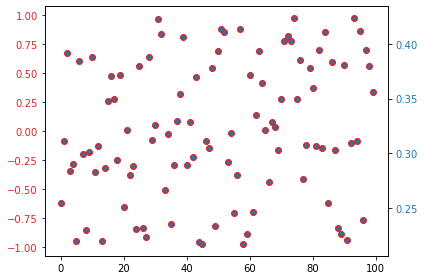

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:red'
# ax1.set_xlabel('time (s)')
# ax1.set_ylabel('exp', color=color)
# omega_test = omega +np.random.uniform(0,1, size = (omega.shape))
ax1.plot(omega, 'o', color=color,linewidth=7.0)
print(np.mean(omega))
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(phi, '.', color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [8]:
# phi = np.zeros(N)
print(np.zeros(N).shape)
# print(t.shape)
print(omega.shape)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K))

(100,)
(100,)


(400, 100)


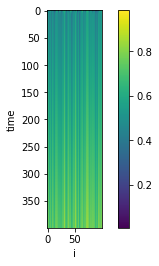

In [9]:
print(sol.shape)
plt.imshow(sol)
plt.xlabel("i")
plt.ylabel("time")
plt.colorbar()

0.012863037018484005


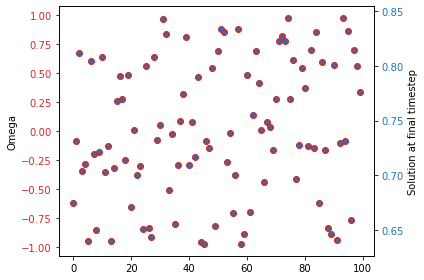

In [10]:
fig, ax1 = plt.subplots()

color = 'tab:red'
# ax1.set_xlabel('time (s)')
# ax1.set_ylabel('exp', color=color)
# omega_test = omega +np.random.uniform(0,1, size = (omega.shape))
ax1.plot(omega, 'o', color=color,linewidth=7.0)
print(np.mean(omega))
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel("Omega")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(sol[-1,:], '.', color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Solution at final timestep")


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

(400, 100)


Text(0, 0.5, 'solution value ')

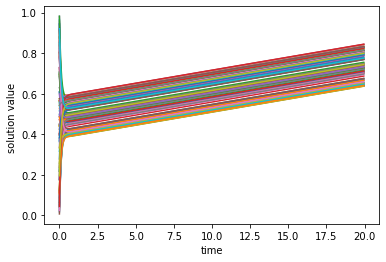

In [11]:
print(sol.shape)
# plt.plot(np.sin(sol[:,0]))
# plt.plot(sol[:,0])
# plt.plot(sol[:,1])
# plt.plot(sol[:,2])
for i in range(100):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
# plt.plot(np.sin(sol[:,1]))
# plt.plot(np.sin(sol[:,2]))

In [12]:
# def phi_dot2(phi, t, omega):
#     return omega

# sol = odeint(phi_dot2, [0], t, args=([0.5],))
# # plt.plot(sol)